In [32]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from scipy import ndimage as ndi
from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage import data
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

In [2]:
hawa1 = cv.imread('hawamahal1.jpg',1)
hawa2 = cv.imread('hawamahal2.jpg',1)
market = cv.imread('market.jpg',1)
pisa = cv.imread('Pisa.jpg',1)
colors = cv.imread('colors.png',1)
panda = cv.imread('panda.jpeg',1)
finger3 = cv.imread('fingerprint3.png',0)
finger4 = cv.imread('fingerprint4.png',0)
finger5 = cv.imread('fingerprint5.png',0)


#Converting from BGR to RGB for CT
hawa1 = cv.cvtColor(hawa1, cv.COLOR_BGR2RGB)
hawa2 = cv.cvtColor(hawa2, cv.COLOR_BGR2RGB)
market = cv.cvtColor(market, cv.COLOR_BGR2RGB)
panda = cv.cvtColor(panda, cv.COLOR_BGR2RGB)
pisa = cv.cvtColor(pisa, cv.COLOR_BGR2RGB)
colors = cv.cvtColor(colors, cv.COLOR_BGR2RGB)

### 2. Morphological operations

In [3]:
def morphology_functions(img, round_par = False, structure = 'None', complement = False):
    
    # define kernel
    kernel = np.ones((3,3),np.uint8)
    if structure == 'round':
        kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
    if structure == 'box':
        kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
    
    # thresholding
    ret, thresh = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    
    # take complement of image
    if complement:
        thresh = 255 - thresh
    
    # erosion
    eroded = cv.erode(thresh,kernel,iterations = 1)
    
    #dilation
    dilated = cv.dilate(thresh,kernel,iterations = 1)
    
    # opening
    opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)
    
    #closing
    closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
    
    # return the processed images
    return thresh, eroded, dilated, opening, closing

In [4]:
fin3_thresh, fin3_erod, fin3_dilat, fin3_open, fin3_close = morphology_functions(finger3)
fin4_thresh, fin4_erod, fin4_dilat, fin4_open, fin4_close = morphology_functions(finger4)
fin5b_thresh, fin5b_erod, fin5b_dilat, fin5b_open, fin5b_close = morphology_functions(finger5, structure = 'box')
fin5r_thresh, fin5r_erod, fin5r_dilat, fin5r_open, fin5r_close = morphology_functions(finger5, structure = 'round')
fin5bc_thresh, fin5bc_erod, fin5bc_dilat, fin5bc_open, fin5bc_close = morphology_functions(finger5, structure = 'box', complement = True)
fin5rc_thresh, fin5rc_erod, fin5rc_dilat, fin5rc_open, fin5rc_close = morphology_functions(finger5, structure = 'round', complement = True)

In [5]:
finger3_img = [finger3, fin3_thresh, fin3_erod, fin3_dilat]
finger4_img = [finger4, fin4_thresh, fin4_erod, fin4_dilat]
finger5b_img = [finger5, fin5b_open, fin5b_close]
finger5r_img = [finger5, fin5r_open, fin5r_close]
finger5bc_img = [255 - finger5, fin5bc_open, fin5bc_close]
finger5rc_img = [255 - finger5, fin5rc_open, fin5rc_close]


finger3_cap = ['Original image', 'Thresholded image', 'Erosion', 'Dilation']
finger4_cap = ['Original image', 'Thresholded image', 'Erosion', 'Dilation']
finger5b_cap = ['Original image', 'Opening', 'Closing']
finger5r_cap = ['Original image', 'Opening', 'Closing']
finger5bc_cap = ['Original image', 'Opening', 'Closing']
finger5rc_cap = ['Original image', 'Opening', 'Closing']

### 2a) Erosion and Dilation

                                           Morphological operations on Fingerprint3


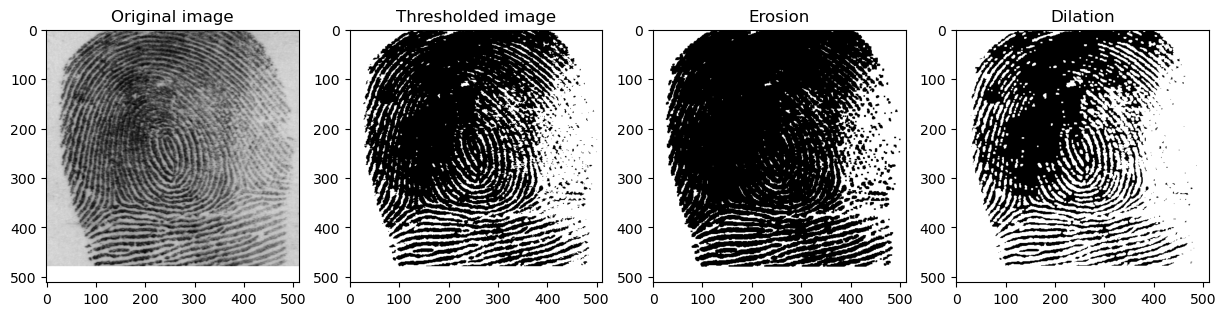

In [6]:
fig, axs = plt.subplots(1,len(finger3_img), figsize = (15,10))

for i in range(len(finger3_img)):
    axs[i].imshow(finger3_img[i], cmap = 'gray')
    axs[i].set_title(finger3_cap[i])
    
print('Morphological operations on Fingerprint3')
plt.show()

                                           Morphological operations on Fingerprint4


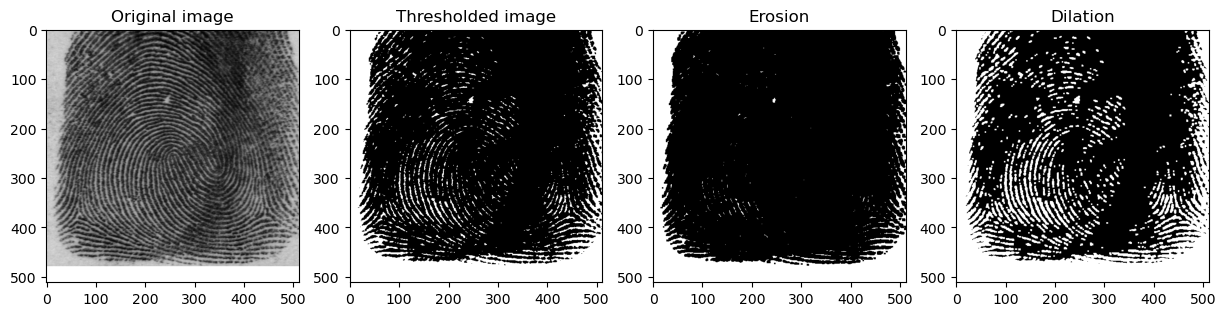

In [7]:
fig, axs = plt.subplots(1,len(finger4_img), figsize = (15,10))

for i in range(len(finger4_img)):
    axs[i].imshow(finger4_img[i], cmap = 'gray')
    axs[i].set_title(finger4_cap[i])
    
print('Morphological operations on Fingerprint4')
plt.show()

### 2b) Opening and Closing on the image and its complement (3x3 box and round structuring elements)

                                           Morphological operations on Fingerprint5 (Box)


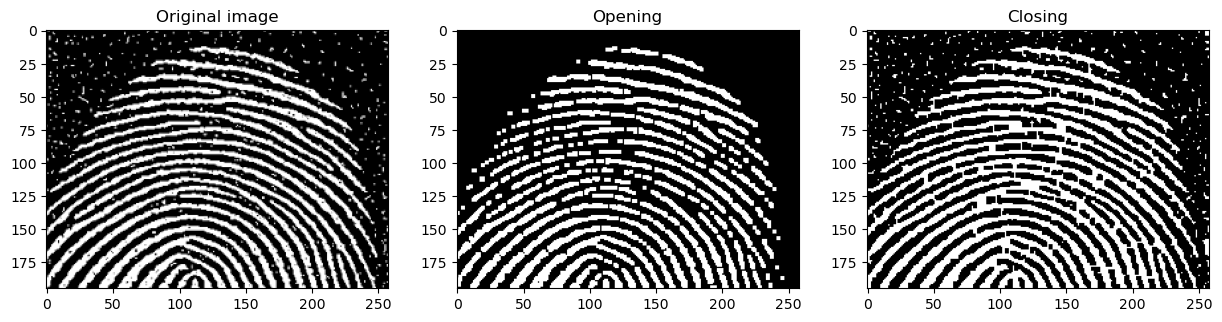

In [8]:
fig, axs = plt.subplots(1,len(finger5b_img), figsize = (15,10))

for i in range(len(finger5b_img)):
    axs[i].imshow(finger5b_img[i], cmap = 'gray')
    axs[i].set_title(finger5b_cap[i])
    
print('Morphological operations on Fingerprint5 (Box)')
plt.show()

                                           Morphological operations on Fingerprint5 (Round)


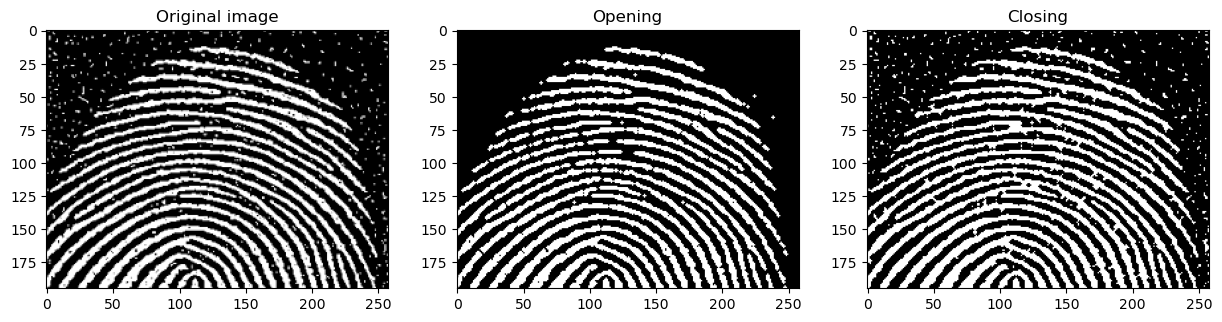

In [9]:
fig, axs = plt.subplots(1,len(finger5r_img), figsize = (15,10))

for i in range(len(finger5r_img)):
    axs[i].imshow(finger5r_img[i], cmap = 'gray')
    axs[i].set_title(finger5r_cap[i])
    
print('Morphological operations on Fingerprint5 (Round)')
plt.show()

                                           Morphological operations on complement of Fingerprint5 (Box)


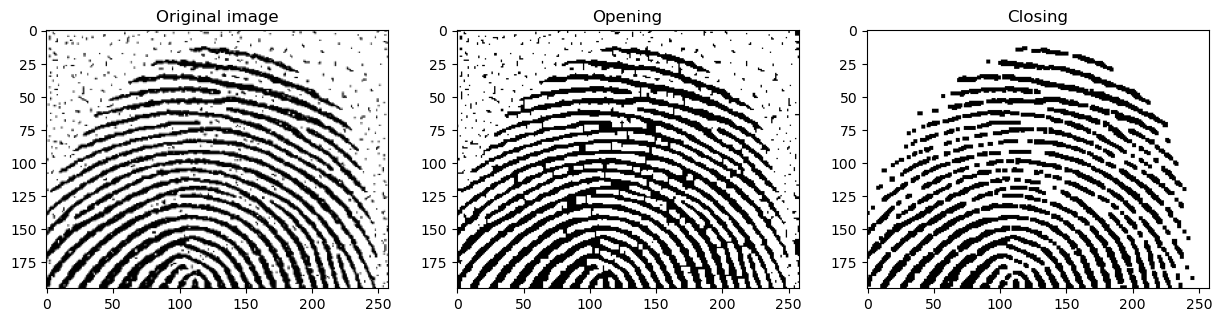

In [10]:
fig, axs = plt.subplots(1,len(finger5bc_img), figsize = (15,10))

for i in range(len(finger5bc_img)):
    axs[i].imshow(finger5bc_img[i], cmap = 'gray')
    axs[i].set_title(finger5bc_cap[i])
    
print('Morphological operations on complement of Fingerprint5 (Box)')
plt.show()

                                           Morphological operations on complement of Fingerprint5 (Round)


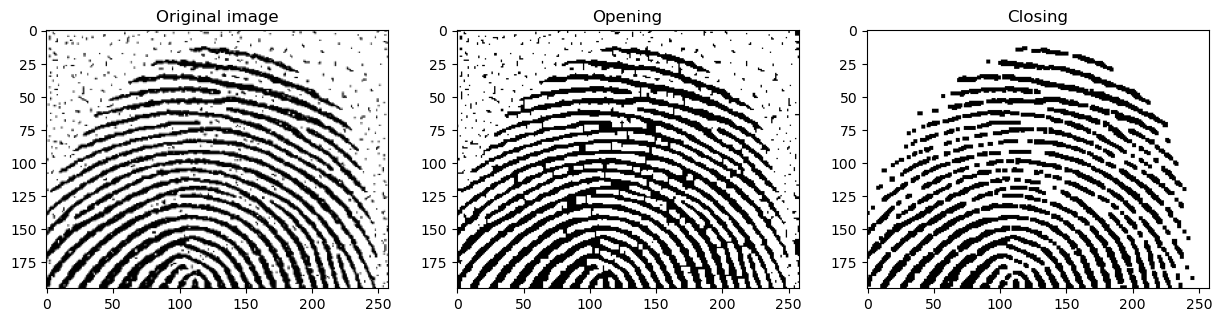

In [11]:
fig, axs = plt.subplots(1,len(finger5bc_img), figsize = (15,10))

for i in range(len(finger5bc_img)):
    axs[i].imshow(finger5bc_img[i], cmap = 'gray')
    axs[i].set_title(finger5bc_cap[i])
    
print('Morphological operations on complement of Fingerprint5 (Round)')
plt.show()

### 2.c K-Means Clustering

In [12]:
# K-means clustering
def kmeans_cluster(img):
    
    # Reshaping the image into a 2D array of pixels and 3 color values (RGB)
    pixel_vals = img.reshape((-1, 3))

    # Convert to float type
    pixel_vals = np.float32(pixel_vals)

    # the below line of code defines the criteria for the algorithm to stop running,
    # which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
    # becomes 90%
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.9)
    
    # list of bin (K) values
    K = [2, 5, 10, 20, 40, 50]
    
    # store the clustered images
    ans = []
    
    # for all k values, run the algorithm
    for i in K:
        # Perform k-means clustering wit h number of clusters defined as k
        # also random centres are initially choosed for k-means clustering
        retval, labels, centers = cv.kmeans(pixel_vals, i, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

        # Convert data into 8-bit values
        center = np.uint8(centers)
        segmented_data = center[labels.flatten()]
        segmented_image = segmented_data.reshape((img.shape))
        
        # append to ans
        ans.append(segmented_image)
        
    # return the list of images
    return ans

In [13]:
# Clustering of market and pisa
market2, market5, market10, market20, market40, market50 = kmeans_cluster(market.copy())
pisa2, pisa5, pisa10, pisa20, pisa40, pisa50 = kmeans_cluster(pisa.copy())

In [43]:
# store the images and captions
market_images = [market2, market5, market10, market20, market40, market50]
pisa_images = [pisa2, pisa5, pisa10, pisa20, pisa40, pisa50]

market_capt = ['k = 2', 'k = 5', 'k = 10', 'k = 20' , 'k = 40', 'k = 50']
pisa_capt = ['k = 2', 'k = 5', 'k = 10', 'k = 20', 'k = 40', 'k = 50']

                                           K-means clutering on market image


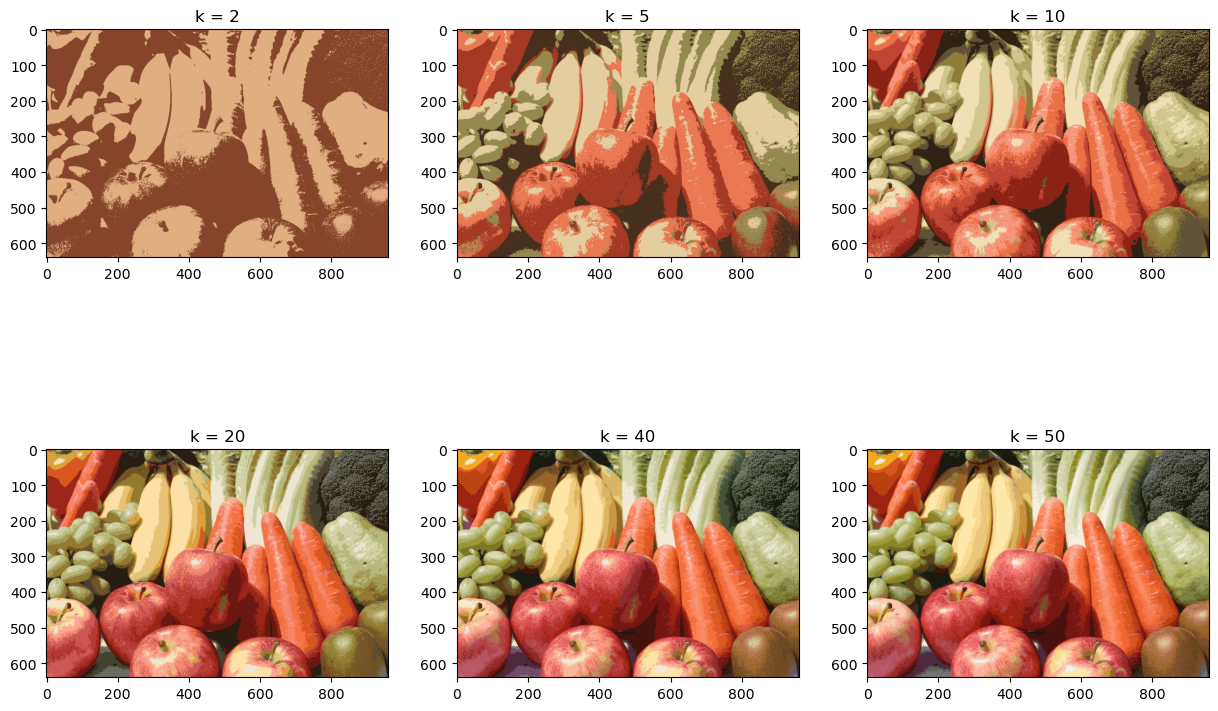

In [46]:
fig, axs = plt.subplots(2, int(len(market_images)/2), figsize = (15,10))
count = 0
for i in range(2):
    for j in range(int(len(market_images)/2)):
        axs[i,j].imshow(market_images[count], cmap = 'gray')
        axs[i,j].set_title(market_capt[count])
        count = count + 1

print('                                           ' + 'K-means clutering on market image')
plt.show()

We observe that as we increase the number of bins, the image gets closer to the original image. When we have 10 bins, the clustered image resembles the original one, but the clarity is a bit poor. When the bins are increased to 20, we find that this clustered image captures most details of the original correctly to a significant extent. However, certain objects in the image still have a mix up of colors, for example, the bell pepper on top left corner. With the number of bins = 50, we have a decent representation of the original image.

                                           K-means clutering on Pisa image


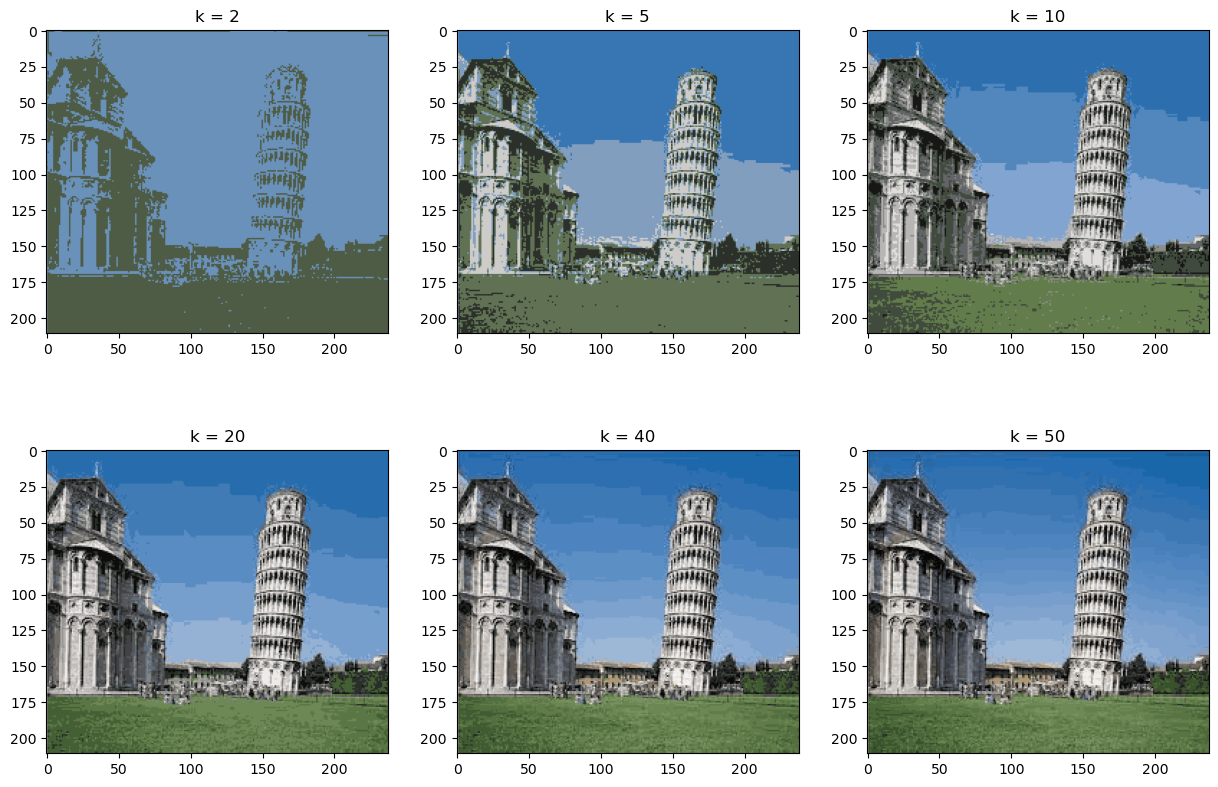

In [47]:
fig, axs = plt.subplots(2, int(len(pisa_images)/2), figsize = (15,10))
count = 0
for i in range(2):
    for j in range(int(len(pisa_images)/2)):
        axs[i,j].imshow(pisa_images[count], cmap = 'gray')
        axs[i,j].set_title(pisa_capt[count])
        count = count + 1

print('                                           ' + 'K-means clutering on Pisa image')
plt.show()

We observe that as we increase the number of bins, we find that with k = 50, we have a reasonably similar image as was our original image. With 5 bins, we get a reasonable resemblance to the original image. 

Hence in both the images, with increasing number of bins, we get an image which gets closer to the actual image, and it makes the segmentation better.

### 2.d Superpixel algorithm

In [17]:
def superpixels(img, n_pixels = [2,5,10,20,30,50,100,150,200], fig_size = (15, 10)):
    
    # load the image and convert it to a floating point data type
    image = img_as_float(img)
    images = []
    captions = []
    # loop over the number of segments
    for numSegments in n_pixels:
        
        # apply SLIC and extract (approximately) the supplied number # of segments
        segments = slic(image, n_segments = numSegments, sigma = 5)
        
        # store the images
        images.append(mark_boundaries(image,segments))
        captions.append('Superpixels = '+str(numSegments))
    
    return images, captions        

In [18]:
pisa_images, pisa_captions = superpixels(pisa.copy(), n_pixels = [2, 5, 7, 8, 10, 20, 30, 50, 100])

<ipython-input-17-cdf6bc5555ee>:11: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(image, n_segments = numSegments, sigma = 5)


                                           Superpixel algorithm on Pisa


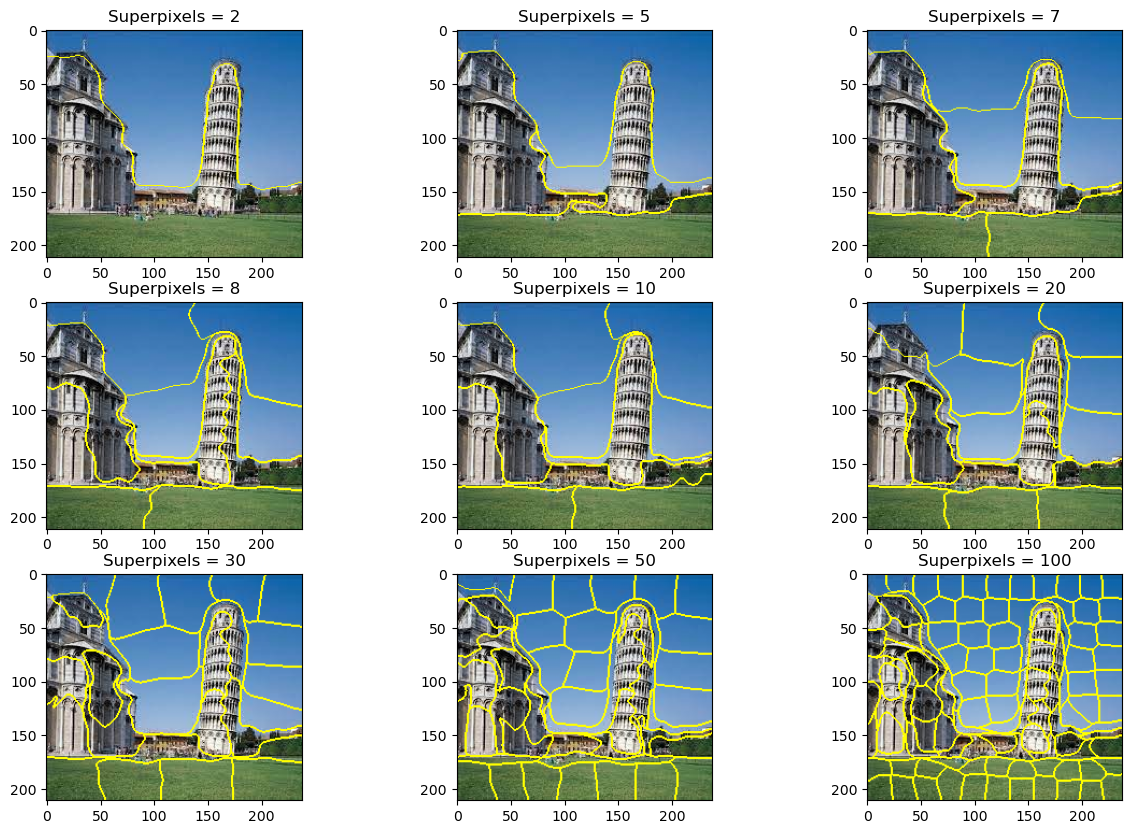

In [19]:
fig, axs = plt.subplots(3, int(len(pisa_images)/3), figsize = (15,10))
count = 0
for i in range(3):
    for j in range(int(len(pisa_images)/3)):
        axs[i,j].imshow(pisa_images[count], cmap = 'gray')
        axs[i,j].set_title(pisa_captions[count])
        count = count + 1

print('Superpixel algorithm on Pisa')
plt.show()

We find that with 5 superpixels a portion of the sky in between the 2 building like structures is being taken to be in the same superpixel, but the overall image is being conserved. With 7 superpixels we see that most of the main features of the image and its identity are preserved. As we increase the number of pixels, the image is being subject to over-segmentation as is visible from above.

In [20]:
panda_images, panda_captions = superpixels(panda.copy(), n_pixels = [10, 20, 30, 40, 50, 60, 70, 80, 100])

<ipython-input-17-cdf6bc5555ee>:11: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(image, n_segments = numSegments, sigma = 5)


                                           Superpixel algorithm on Panda


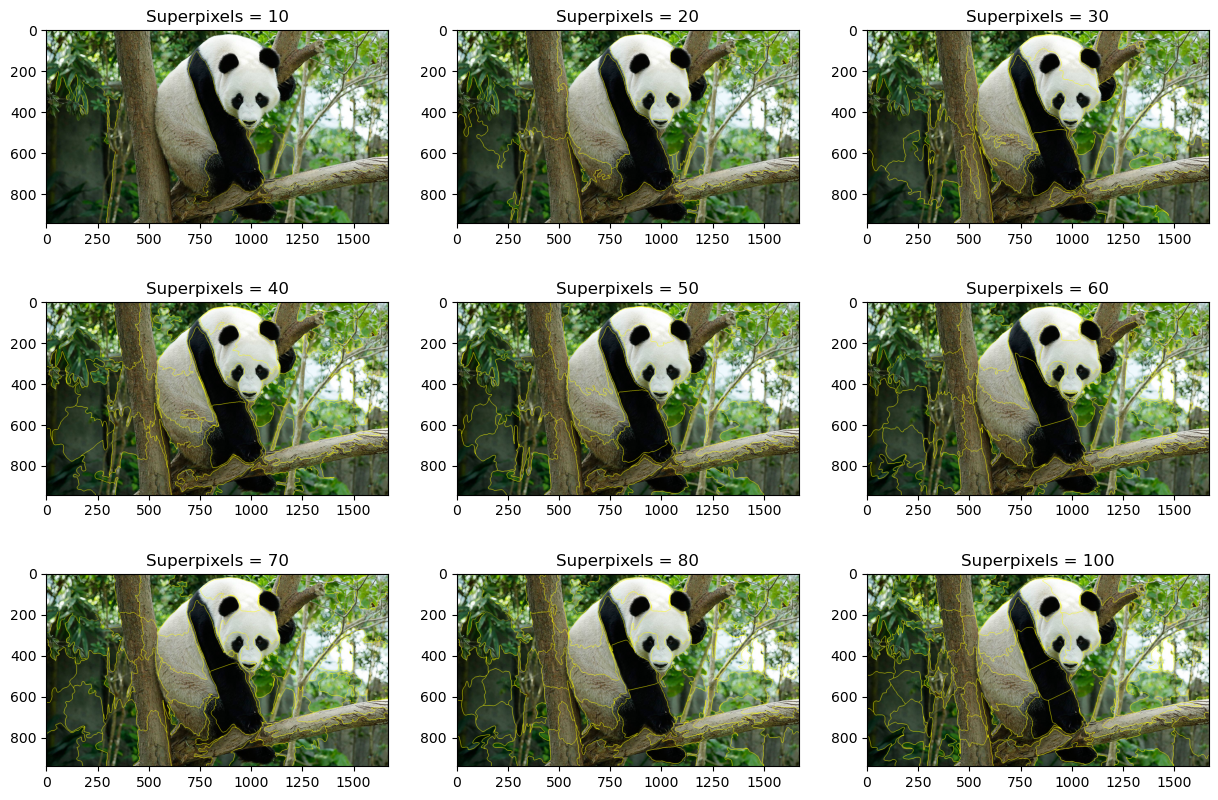

In [21]:
fig, axs = plt.subplots(3, int(len(panda_images)/3), figsize = (15, 10))
count = 0
for i in range(3):
    for j in range(int(len(panda_images)/3)):
        axs[i,j].imshow(panda_images[count], cmap = 'gray')
        axs[i,j].set_title(panda_captions[count])
        count = count + 1

print('Superpixel algorithm on Panda')
plt.show()

Before we take 60 superpixels, the ears of the panda are not distuinguishable from the other features of the image. With as little as 20 superpixels, we can preserve most of the characteristics of the image. However, if we want some finer details to be accounted for (like the ears) then we would need at least 60 superpixels. 

### 2.e  Watershed algorithm

In [28]:
def apply_watershed(img, name, orig):
    
    thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]

    # Compute Euclidean distance from every binary pixel
    # to the nearest zero pixel then find peaks
    distance_map = ndimage.distance_transform_edt(thresh)
    local_max = peak_local_max(distance_map, indices=False, min_distance=20, labels=thresh)

    # Perform connected component analysis then apply Watershed
    markers = ndimage.label(local_max, structure=np.ones((3, 3)))[0]
    labels = watershed(-distance_map, markers, mask=thresh)

    # Iterate through unique labels
    total_area = 0
    for label in np.unique(labels):
        if label == 0:
            continue

        # Create a mask
        mask = np.zeros(img.shape, dtype="uint8")
        mask[labels == label] = 255

        # Find contours and determine contour area
        cnts = cv.findContours(mask.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        c = max(cnts, key=cv.contourArea)
        area = cv.contourArea(c)
        total_area += area
        cv.drawContours(img, [c], -1, (36,255,12), 4)

    # display results
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8),
                             sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(orig, cmap=plt.cm.gray)
    ax[0].set_title("Original")

    ax[1].imshow(img, cmap=plt.cm.gray)
    ax[1].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5)
    ax[1].set_title("Segmented")
    
    print('Watershed segmentation on '+name)

    for a in ax:
        a.axis('off')

    fig.tight_layout()
    plt.show()

<ipython-input-28-3c96e85309c0>:8: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(distance_map, indices=False, min_distance=20, labels=thresh)


                                       Watershed segmentation on Colors


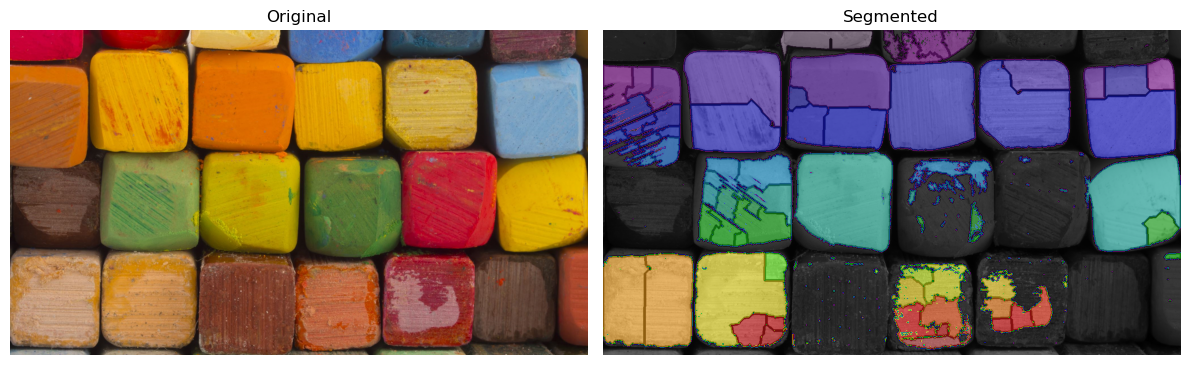

In [33]:
# Watershed on Colors image
apply_watershed(cv.cvtColor(colors.copy(), cv.COLOR_RGB2GRAY), name = 'Colors', orig = colors)

<ipython-input-28-3c96e85309c0>:8: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(distance_map, indices=False, min_distance=20, labels=thresh)


                                       Watershed segmentation on Market


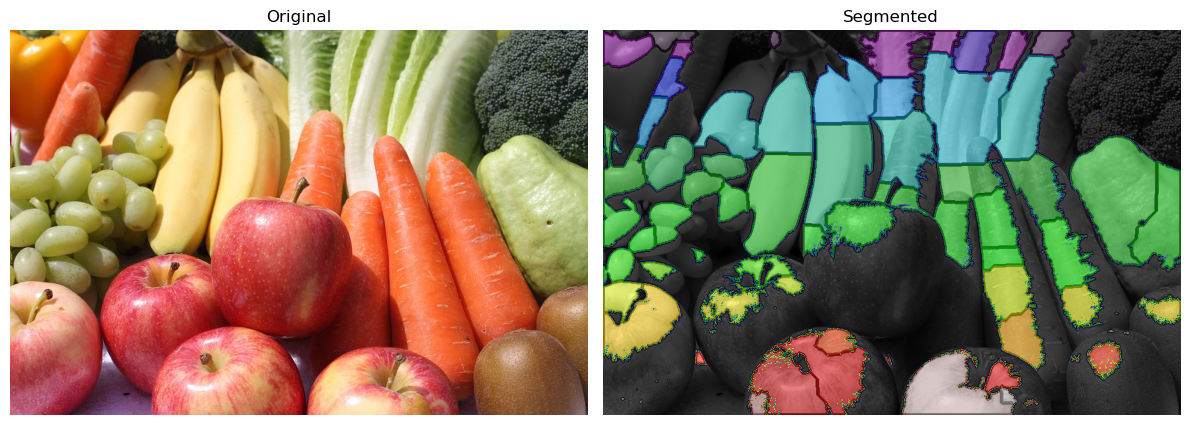

In [34]:
# Watershed on Market image
apply_watershed(cv.cvtColor(market.copy(), cv.COLOR_RGB2GRAY), name = 'Market', orig = market)

### 3. SIFT to find matching keypoints

In [35]:
# SIFT
def apply_sift(img1, img2, matchings = 50):
    #sift
    sift = cv.SIFT_create()
    
    # finding the keypoints and storing the descriptor information
    keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
    
    #feature matching
    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

    # checking for matches
    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)

    # drawing the matches
    img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:matchings], img2, flags=2)
    
    # returning the matched image
    return img3

In [36]:
# applying SIFT to hawa mahal
sift_hawa_50 = apply_sift(hawa1.copy(), hawa2.copy(), matchings = 50)
sift_hawa_80 = apply_sift(hawa1.copy(), hawa2.copy(), matchings = 80)

In [38]:
hawa_images = [hawa1, hawa2, sift_hawa_50, sift_hawa_80]
hawa_capt = ['Image 1', 'Image 2', 'Matchings(50)', 'Matchings(80)']

                                           SIFT on Hawa Mahal images


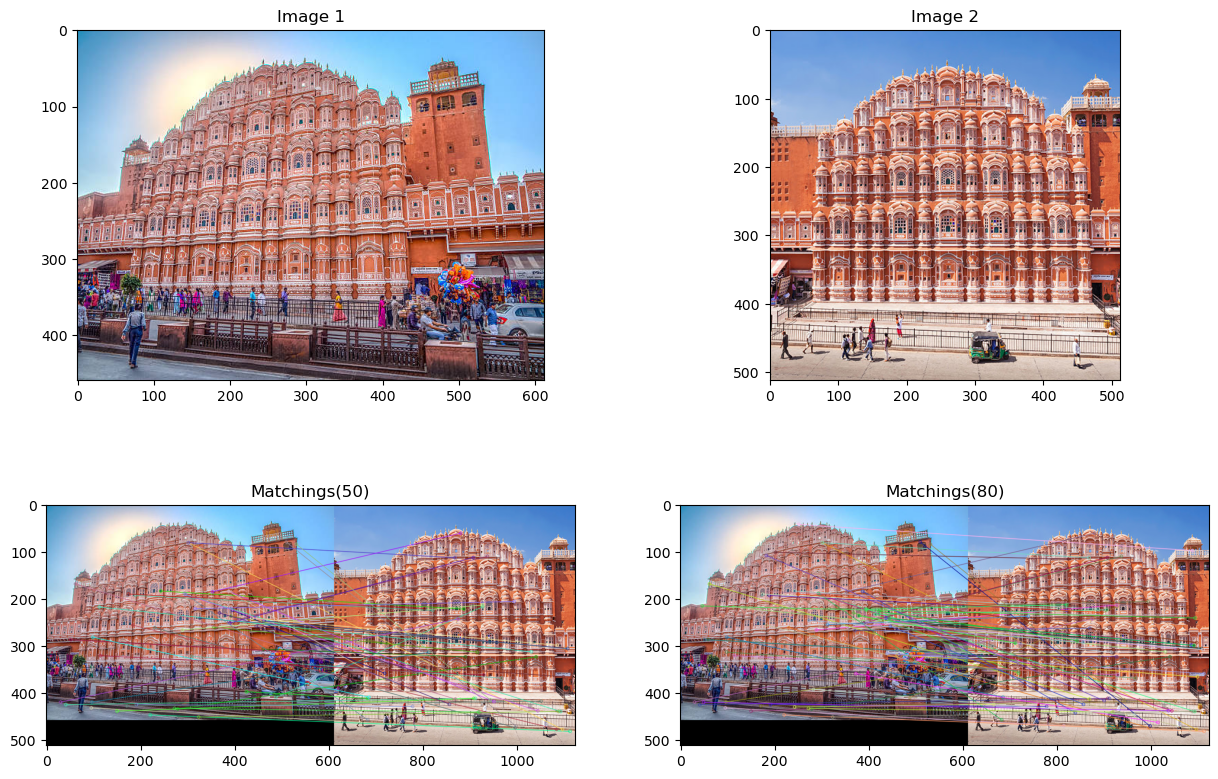

In [39]:
fig, axs = plt.subplots(2, int(len(hawa_images)/2), figsize = (15,10))
count = 0
for i in range(2):
    for j in range(int(len(hawa_images)/2)):
        axs[i,j].imshow(hawa_images[count], cmap = 'gray')
        axs[i,j].set_title(hawa_capt[count])
        count = count + 1

print('SIFT on Hawa Mahal images')
plt.show()